In [34]:
import glob, json, os, random, statistics, time
from tqdm import tqdm
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
# from __future__ import print_function
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns


In [35]:
dirs = ['african', 'indian', 'hongkong', 'philippines', 
           'england', 'scotland', 'ireland', 'australia', 
           'canada', 'us']

print(dirs)

['african', 'indian', 'hongkong', 'philippines', 'england', 'scotland', 'ireland', 'australia', 'canada', 'us']


In [36]:
import pickle 
import numpy as np

def load_features(file_dir, feature):
    features = []
    with open(file_dir.replace('.json', '_'+feature+'.file'), 'rb') as f:
        while True:
            try:
                features.append(pickle.load(f))
            except EOFError:
                break
    print(features[-1].shape)
    features = np.concatenate(features, axis=0)
    return features[:1000]



base_dir = '/home/mayank/MTP/begin_again/Error-Driven-ASR-Personalization/mz-isca/expts/'

In [37]:
ground_list, ground_list_Y, ground_features = [], [], []
for i, _dir in enumerate(dirs):
    selection_file_path = base_dir + _dir + '/manifests/selection.json'
    selection_file_list = [json.loads(line.strip()) for line in open(selection_file_path)]
    selection_file_list = selection_file_list
    ground_list.extend(selection_file_list)
    ground_features.append(load_features(selection_file_path, "wv10_100"))
    print(_dir+" has "+str(len(selection_file_list))+" samples.")
    ground_list_Y.extend([i]*len(selection_file_list))
    
ground_features = np.concatenate(ground_features, axis=0)
ground_features_Y = np.asarray(ground_list_Y).reshape(-1, 1) 
print(len(ground_list), ground_features.shape, ground_features_Y.shape)

(1, 100)
african has 1000 samples.
(1, 100)
indian has 1000 samples.
(1, 100)
hongkong has 1000 samples.
(1, 100)
philippines has 1000 samples.
(1, 100)
england has 1000 samples.
(1, 100)
scotland has 1000 samples.
(1, 100)
ireland has 1000 samples.
(1, 100)
australia has 1000 samples.
(1, 100)
canada has 1000 samples.
(1, 100)
us has 1000 samples.
10000 (10000, 100) (10000, 1)


In [38]:
def _color_map(dirs):
#     color = ["midnightblue", "royalblue", "indigo", "darkgreen", 'lime', "green", 'pink', 'fuchsia', 'red', 
#              'yellow', 'black']
    color = ["midnightblue", "darkgreen", 'lime', 'pink', 'red', 
             'yellow', 'black']
    color_map = {}
    for _dir, color in zip(dirs+['query_set', 'selected_set'], color):
        color_map[_dir] = color
    return color_map

In [39]:
X, y = ground_features, ground_features_Y

print(X.shape, y.shape)
print('\n\n')
feat_cols = ['dim'+str(i) for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=feat_cols)
df['y'] = y

label_map = dict(enumerate(dirs))
df['label'] = df['y'].apply(lambda i: label_map[i])

(10000, 100) (10000, 1)





In [44]:
# perp=0.83*(X.shape[0]**0.5)
perp=100
iters=9000
tsne = TSNE(n_components=2, verbose=1, perplexity=perp, n_iter=iters)
tsne_results = tsne.fit_transform(df[feat_cols].values)

df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.002s...
[t-SNE] Computed neighbors for 10000 samples in 2.745s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.241598
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.944927
[t-SNE] KL divergence after 9000 iterations: 0.754377


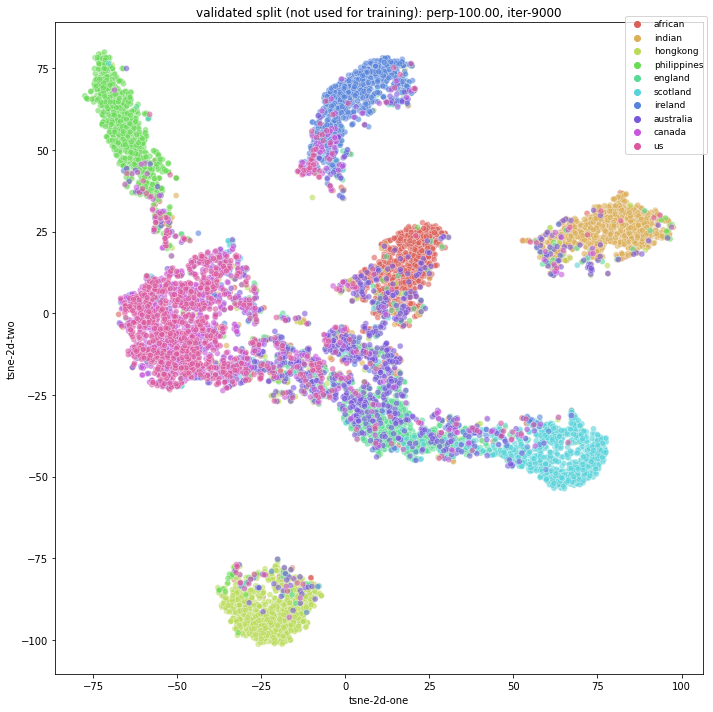

<Figure size 7200x4800 with 0 Axes>

In [45]:
fig = plt.figure(figsize=(10,10))
_ax = fig.add_subplot(1,1,1)
_ax.title.set_text('validated split (not used for training): perp-{:.2f}, iter-{}'.format(perp, iters))
g = sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
    palette=sns.color_palette("hls", len(dirs)),
    data=df,
    legend="full",
#     markers= [0.5]*y.shape[0],
#     legend=False,
    alpha=0.6,
    ax = _ax
)
plt.figure(dpi=1200)
# plt.legend(loc='upper right')
g.legend(
         loc='upper right', 
#          loc=1,
         bbox_to_anchor=(1.013, 1.017), 
         prop={'size':9}, markerscale=1)
fig.tight_layout()

In [9]:
fig.savefig('t-SNE-w2v2-{:.1f}-{}.svg'.format(perp, iters)) # , bbox_inches='tight', pad_inches=0
# plt.close()

In [12]:
import random
import statistics

budget_size = 100
list_total_duration = []
for i in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    temp_ground_list = ground_list[:]
    random.seed(41 + i)
    random.shuffle(temp_ground_list)
    selected_list = temp_ground_list[:budget_size]     
    total_duration = sum([i['duration'] for i in selected_list])
    list_total_duration.append(total_duration)
print(list_total_duration)
print(statistics.mean(list_total_duration), statistics.variance(list_total_duration)**0.5)

[349.8313151927439, 348.55603174603175, 384.2055782312925, 368.39784580498855, 371.83752834467117, 349.4521541950115, 391.92988662131506, 382.27376417233575, 337.606394557823, 359.0694784580499]
364.3159977324263 18.177775872541453


In [ ]:
# t-sne on invalidated (feature training set)

In [35]:
# dirs = [f.name for f in os.scandir('../MCV_accent/jsons/') if '.json' in f.name and f.name.split('.')[0] in ['canada', 'england', 'australia', 'us', 'indian', 'philippines', 'african']]
dirs = [f.name for f in os.scandir('../MCV_accent/invalidated/') if '.json' in f.name and f.name.split('.')[0] not in ['unlabelled', 'other']]

print(dirs)

['philippines.json', 'indian.json', 'australia.json', 'us.json', 'england.json', 'canada.json', 'african.json']


In [ ]:
ground_list, ground_list_Y, ground_features = [], [], []
for i, _dir in enumerate(dirs):
    selection_file_path = base_dir + _dir + '/manifests/selection.json'
    selection_file_list = [json.loads(line.strip()) for line in open(selection_file_path)]
    selection_file_list = selection_file_list
    ground_list.extend(selection_file_list)
    ground_features.append(load_features(selection_file_path, "39"))
    print(_dir+" has "+str(len(selection_file_list))+" samples.")
    ground_list_Y.extend([i]*len(selection_file_list))
    
ground_features = np.concatenate(ground_features, axis=0)
ground_features_Y = np.asarray(ground_list_Y).reshape(-1, 1) 
print(len(ground_list), ground_features.shape, ground_features_Y.shape)

In [ ]:
X, y = ground_features, ground_features_Y

print(X.shape, y.shape)
print('\n\n')
feat_cols = ['dim'+str(i) for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=feat_cols)
df['y'] = y

label_map = dict(enumerate(dirs))
df['label'] = df['y'].apply(lambda i: label_map[i])

In [ ]:
perp=0.83*(X.shape[0]**0.5)
iters=3000
tsne = TSNE(n_components=2, verbose=1, perplexity=perp, n_iter=iters)
tsne_results = tsne.fit_transform(df[feat_cols].values)

df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]

In [ ]:
fig = plt.figure(figsize=(6,5))
_ax = fig.add_subplot(1,1,1)
_ax.title.set_text('invalidated-MCV (training set of classifier): perp-{:.2f}, iter-{}'.format(perp, iters))
g = sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
    palette=sns.color_palette("hls", len(dirs)),
    data=df,
    legend="full",
#     markers= [0.5]*y.shape[0],
#     legend=False,
    alpha=0.6,
    ax = _ax
)
plt.figure(dpi=1200)
# plt.legend(loc='upper right')
g.legend(
         loc='upper right', 
#          loc=1,
         bbox_to_anchor=(1.013, 1.017), 
         prop={'size':9}, markerscale=1)
fig.tight_layout()

In [ ]:
fig.savefig('t-SNE-39-{:.2f}-{}.svg'.format(perp, iters)) # , bbox_inches='tight', pad_inches=0
# plt.close()

In [14]:
def distribution_stats(accent_list, budget_size, seeds):
    ground_list, ground_list_Y, ground_features = [], [], []
    for i, _dir in enumerate(accent_list):
        selection_file_path = base_dir + _dir + '/manifests/selection.json'
        print(selection_file_path)
        selection_file_list = [json.loads(line.strip()) for line in open(selection_file_path)]
#         selection_file_list = selection_file_list[:500]
        ground_list.extend(selection_file_list)
        print(_dir+" has "+str(len(selection_file_list))+" samples.")
        ground_list_Y.extend([i]*len(selection_file_list))
    print(len(ground_list))
    list_total_duration = []
    for i in range(seeds):
        temp_ground_list = ground_list[:]
        random.seed(41 + i)
        random.shuffle(temp_ground_list)
        selected_list = temp_ground_list[:budget_size]     
        total_duration = sum([i['duration'] for i in selected_list])
        list_total_duration.append(total_duration)
    list_total_duration = [int(t) for t in list_total_duration]
    print("sampling {} samples {} times, we got durations {}".format(budget_size, seeds, list_total_duration))
    print("have mean:{:.2f}, std.dev: {:.2f}".format(statistics.mean(list_total_duration), statistics.variance(list_total_duration)**0.5))

In [18]:
full_dirs = ['philippines', 'indian', 'australia', 'us', 'england', 'canada', 'african']
# distribution_stats(['indian', 'us'], 100, 3)
distribution_stats(full_dirs, 100, 3)

/home/mayank/MTP/begin_again/Error-Driven-ASR-Personalization/mz-expts/philippines/manifests/selection.json
philippines has 1350 samples.
/home/mayank/MTP/begin_again/Error-Driven-ASR-Personalization/mz-expts/indian/manifests/selection.json
indian has 3450 samples.
/home/mayank/MTP/begin_again/Error-Driven-ASR-Personalization/mz-expts/australia/manifests/selection.json
australia has 1350 samples.
/home/mayank/MTP/begin_again/Error-Driven-ASR-Personalization/mz-expts/us/manifests/selection.json
us has 10450 samples.
/home/mayank/MTP/begin_again/Error-Driven-ASR-Personalization/mz-expts/england/manifests/selection.json
england has 2750 samples.
/home/mayank/MTP/begin_again/Error-Driven-ASR-Personalization/mz-expts/canada/manifests/selection.json
canada has 1350 samples.
/home/mayank/MTP/begin_again/Error-Driven-ASR-Personalization/mz-expts/african/manifests/selection.json
african has 1350 samples.
22050
sampling 100 samples 3 times, we got durations [541, 543, 525]
have mean:536.33, std.